In [1]:
import pandas as pd
import geopandas as gpd

# 지하철

In [2]:
root = pd.read_csv('../../국토부해커톤/지하철전체위경도.csv', encoding = 'cp949')

In [3]:
root.describe()

,역위도,역경도
count,295.000000,295.000000
mean,37.547431,127.006093
std,0.059223,0.148038
min,36.963209,126.797482
25%,37.510342,126.934193
50%,37.547470,127.013537
75%,37.576135,127.062113
max,37.689417,129.091131


In [4]:
ind = root.loc[root['역경도'] > 128].index #양원역

In [5]:
root.loc[ind, ['역위도']] = 37.6068632
root.loc[ind, ['역경도']] = 127.1077551

In [6]:
subway_loc = gpd.GeoDataFrame(root, geometry = gpd.points_from_xy(root['역경도'], root['역위도']), crs = 'epsg:4326')

In [92]:
subway_loc.to_csv('./Data/서울시_지하철역_전처리.csv', index = False)

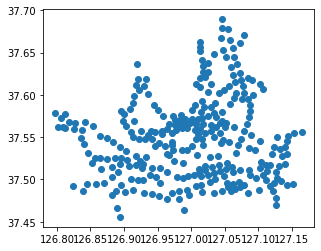

In [7]:
subway_loc.plot();

# 버스

In [37]:
root_bus = pd.read_csv('./Data/서울시버스정류소좌표데이터(2021.01.14.).csv', encoding = 'euc-kr')

In [38]:
root_bus.head()

,표준ID,ARS-ID,정류소명,X좌표,Y좌표
0,100000001,1001,종로2가사거리,126.987786,37.569764
1,100000002,1002,창경궁.서울대학교병원,126.996520,37.579179
2,100000003,1003,명륜3가.성대입구,126.998290,37.582709
3,100000004,1004,종로2가.삼일교,126.987507,37.568582
4,100000005,1005,혜화동로터리.여운형활동터,127.001694,37.586230


In [39]:
root_bus.describe()

,표준ID,ARS-ID,X좌표,Y좌표
count,1.092100e+04,10921.000000,10921.000000,10921.000000
mean,1.131697e+08,14260.396118,126.985616,37.550960
std,6.906108e+06,6916.186899,0.086083,0.055194
min,1.000000e+08,1001.000000,126.507000,37.430780
25%,1.079001e+08,8721.000000,126.916867,37.502671
50%,1.139000e+08,14510.000000,126.994626,37.550325
75%,1.199000e+08,20519.000000,127.050836,37.591408
max,1.249001e+08,25999.000000,127.181760,37.781594


In [40]:
root_bus.loc[root_bus['Y좌표'] > 37.75, 'X좌표'] = 127.0468993
root_bus.loc[root_bus['Y좌표'] > 37.75, 'Y좌표'] = 37.461506 #염곡마을

In [41]:
root_bus = root_bus.drop([10910, 10911], axis = 0)#.loc[root_bus['정류소명'].str.contains('명일동국민은행')]
#root_bus.loc[root_bus['정류소명'].str.contains('명일동국민은행')]

In [42]:
root_bus.loc[root_bus['정류소명'].str.contains('염곡마을')]

,표준ID,ARS-ID,정류소명,X좌표,Y좌표
9175,121000249,22325,염곡마을,127.048985,37.461666
9176,121000250,22326,염곡마을,127.049029,37.461811
9196,121000273,22350,염곡마을,127.046899,37.461506
9197,121000274,22351,염곡마을.내곡동주민센터,127.049173,37.461751


In [69]:
root_bus.loc[(root_bus['X좌표'] < 126.81) & (root_bus['Y좌표']  < 37.55)]

,표준ID,ARS-ID,정류소명,X좌표,Y좌표
6560,115000607,16725,오쇠동꽃단지,126.797810,37.538266
6561,115000606,16726,오쇠동꽃단지,126.797515,37.538192


In [70]:
bus_loc = gpd.GeoDataFrame(root_bus, geometry=gpd.points_from_xy(root_bus['X좌표'], root_bus['Y좌표']), crs = 'epsg:4326')

In [71]:
bus_loc.to_csv('./Data/서울시_버스정류소_전처리.csv', index = False)

# 따릉이

In [75]:
root_bike = pd.read_csv('./Data/공공자전거 대여소 정보(21.06월 기준).csv', encoding = 'cp949',
                        skiprows = 4)

In [77]:
root_bike.columns = ['대여소번호', '대여소명', '자치구', '상세주소',
                     '위도', '경도', '설치시기', 'LCD_거치대수', 'QR_거치대수', '운영방식']

In [81]:
root_bike = root_bike.fillna(0)

In [84]:
root_bike['총 거치대수'] = root_bike['LCD_거치대수'] + root_bike['QR_거치대수']

In [87]:
root_bike = root_bike.drop(columns = ['LCD_거치대수', 'QR_거치대수'])

In [89]:
root_bike.describe()

,대여소번호,위도,경도,총 거치대수
count,2467.000000,2467.000000,2467.000000,2467.000000
mean,1965.064856,37.532988,126.940433,12.417106
std,1335.056455,0.757753,2.558402,4.744904
min,102.000000,0.000000,0.000000,4.000000
25%,845.500000,37.506330,126.916916,10.000000
50%,1713.000000,37.547070,127.003761,10.000000
75%,2744.500000,37.577787,127.063034,15.000000
max,4869.000000,37.691013,127.180641,40.000000


In [90]:
root_bike.to_csv('./Data/서울시_따릉이대여소_전처리.csv', index = False)